In [ ]:
!pip install patool

In [ ]:
import patoolib

In [ ]:
patoolib.extract_archive('/content/songgee.zip')

patool: Extracting /content/songgee.zip ...
patool: running /usr/bin/7z x -o./Unpack_r3cu7h3b -- /content/songgee.zip
patool: ... /content/songgee.zip extracted to `songgee1' (local file exists).


'songgee1'

# **ML Facial recognition to detect mood and suggest songs accordingly**

In [ ]:
#Import Libraries/Packages
import numpy as np
import cv2
import os
import random
from skimage.io import imread
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization, Conv2D,MaxPooling2D,Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from IPython.display import Audio

In [ ]:
print("TensorFlow version :", tf.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

TensorFlow version : 2.13.0
Num GPUs Available:  0


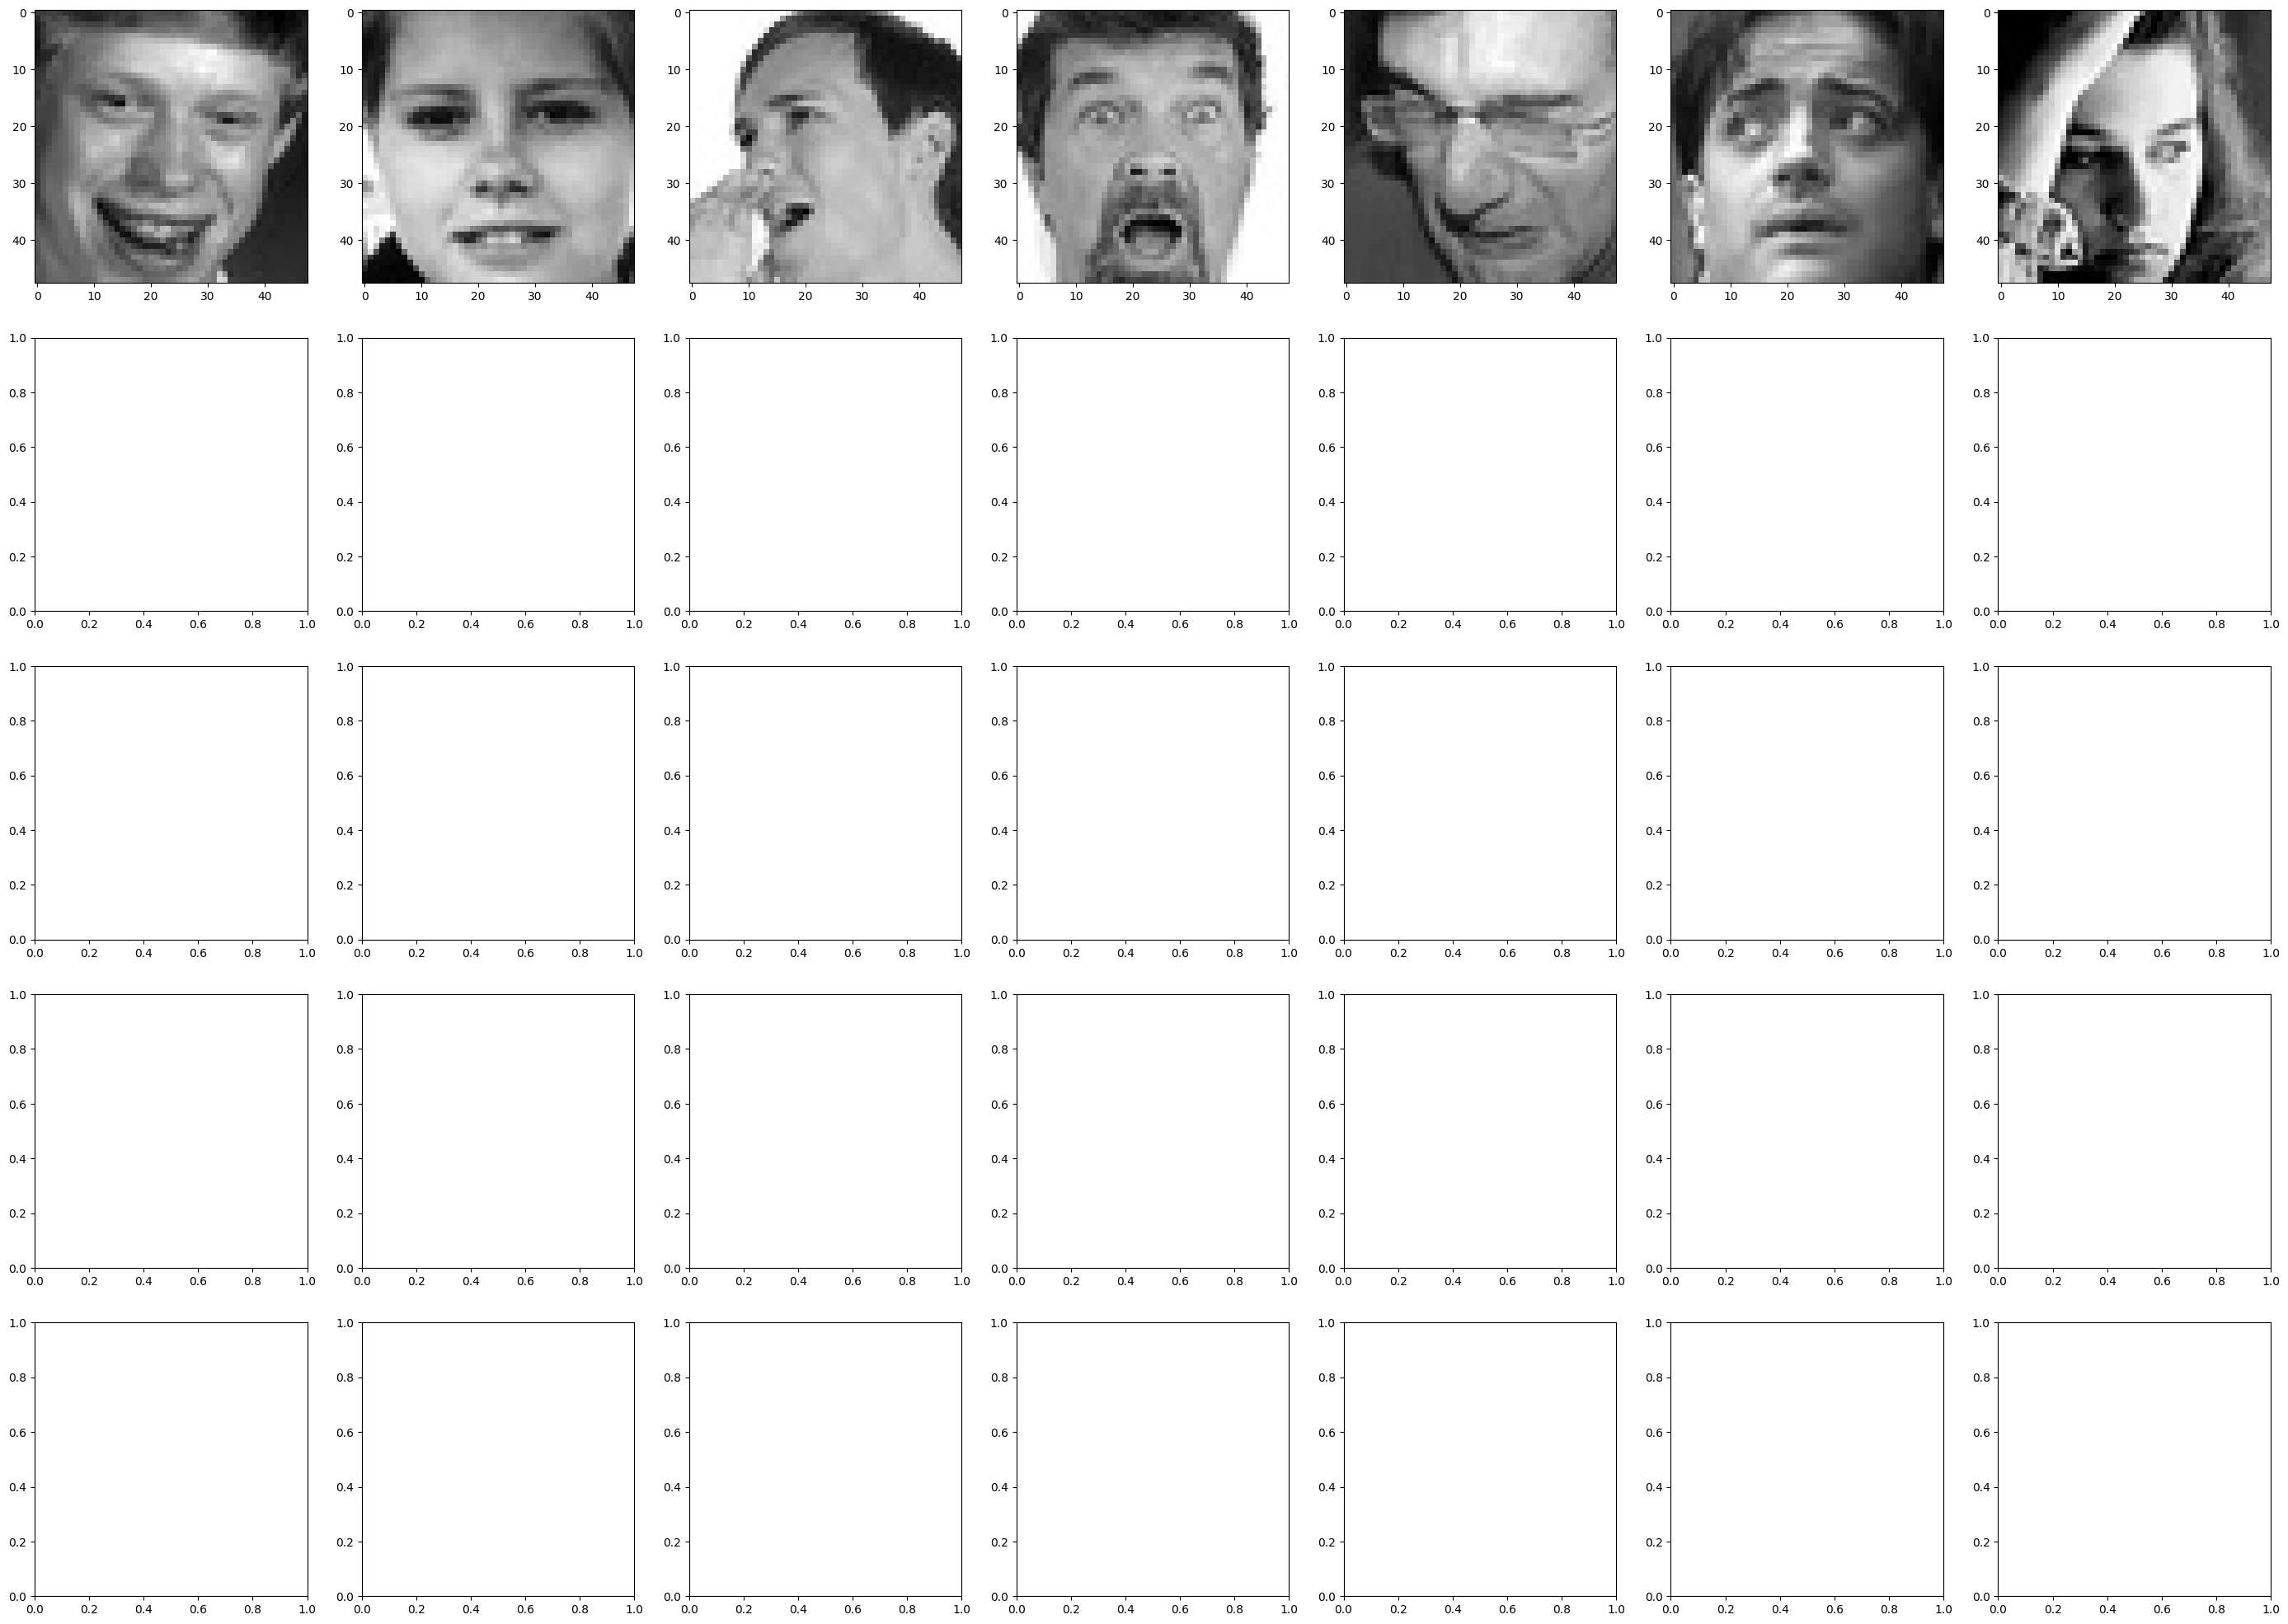

In [ ]:
import os
from skimage.io import imread
import matplotlib.pyplot as plt

train_dir = "/content/archive (2)/train"
test_dir = "/content/archive (2)/test"

label_directories = os.listdir(train_dir)

fig, ax = plt.subplots(nrows=5, ncols=len(label_directories), figsize=(35, 25))
ax = ax.ravel()  # Flatten the ax array to 1D

for x in range(5):
    for y, label in enumerate(label_directories):
        label_path = os.path.join(train_dir, label)
        image_files = os.listdir(label_path)

        if x < len(image_files):
            image_path = os.path.join(label_path, image_files[x])
            ax[y].imshow(imread(image_path), cmap='gray')  # Access ax using a single index

plt.show()


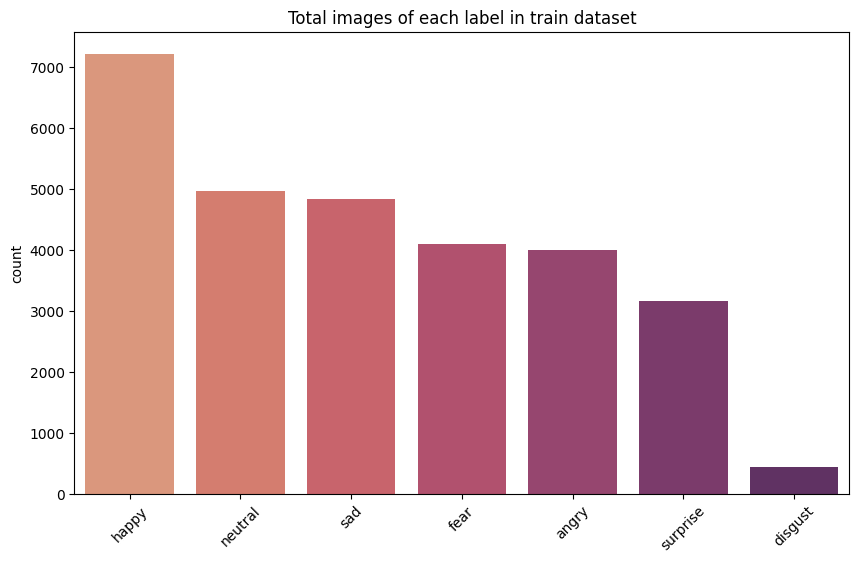

In [ ]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = {}
for i in os.listdir(train_dir):
    directory = os.path.join(train_dir, i)  # Use os.path.join to construct the directory path
    df[i] = len(os.listdir(directory))

df = pd.DataFrame(df, index=["total"]).transpose().sort_values("total", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=df.index, y="total", palette="flare", data=df)
plt.ylabel("count")
plt.title("Total images of each label in train dataset")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

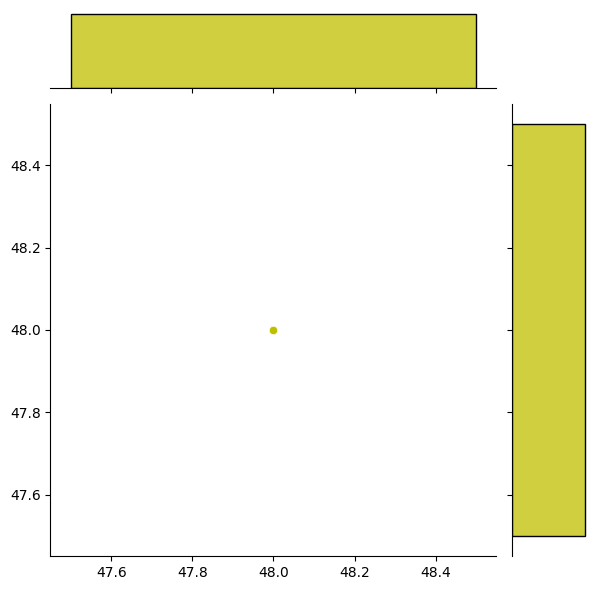

In [ ]:
import os
from skimage.io import imread
import matplotlib.pyplot as plt
import seaborn as sns

happy_dir = os.path.join(train_dir, 'happy')  # Construct the path using os.path.join
happy = os.listdir(happy_dir)
dim1, dim2 = [], []

for img_filename in happy:
    img = imread(os.path.join(happy_dir, img_filename))  # Construct the image path using os.path.join
    d1, d2 = img.shape
    dim1.append(d1)
    dim2.append(d2)

img_shape = (int(np.mean(dim1)), int(np.mean(dim2)), 1)

# Pass dim1 and dim2 as separate variables to jointplot
sns.jointplot(x=dim1, y=dim2, color='y')
plt.show()


In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Import ImageDataGenerator from tensorflow.keras
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.io import imread

# Rest of your code...

# Data Preprocessing
train_gen = ImageDataGenerator(rescale=1/255,
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                fill_mode='nearest')

test_gen = ImageDataGenerator(rescale=1/255)

img_shape = (int(np.mean(dim1)), int(np.mean(dim2)), 1)

train_generator = train_gen.flow_from_directory(directory=train_dir,
                                                target_size=(img_shape[0], img_shape[1]),
                                                color_mode='grayscale',
                                                batch_size=64,
                                                class_mode='categorical',
                                                shuffle=True)

test_generator = test_gen.flow_from_directory(directory=test_dir,
                                                target_size=(img_shape[0], img_shape[1]),
                                                color_mode='grayscale',
                                                batch_size=64,
                                                class_mode='categorical',
                                                shuffle=False)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
import os
import numpy as np
from tensorflow.keras.models import Sequential  # Import Sequential from tensorflow.keras.models
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.io import imread

# Rest of your code...

# Create the Model
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', input_shape=img_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=len(os.listdir(train_dir)), activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 64)        256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       73856     
                                                                 
 batch_normalization_1 (Bat  (None, 24, 24, 128)       5

In [ ]:
import os
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import tensorflow as tf  # Import TensorFlow
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.io import imread

# Define your data preprocessing steps and image dimensions as per your previous code
train_dir = "/content/archive (2)/train"
test_dir = "/content/archive (2)/test"
happy_dir = os.path.join(train_dir, 'happy')

dim1, dim2 = [], []

for img_filename in os.listdir(happy_dir):
    img = imread(os.path.join(happy_dir, img_filename))
    d1, d2 = img.shape
    dim1.append(d1)
    dim2.append(d2)

img_shape = (int(np.mean(dim1)), int(np.mean(dim2)), 1)

# Data Preprocessing
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

train_generator = train_gen.flow_from_directory(
    directory=train_dir,
    target_size=(img_shape[0], img_shape[1]),
    color_mode='grayscale',
    batch_size=64,
    class_mode='categorical',
    shuffle=True
)

test_generator = test_gen.flow_from_directory(
    directory=test_dir,
    target_size=(img_shape[0], img_shape[1]),
    color_mode='grayscale',
    batch_size=64,
    class_mode='categorical',
    shuffle=False
)

# Create the Model
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=img_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=len(os.listdir(train_dir)), activation='softmax'))

model.summary()

# Train the model with learning rate scheduling
initial_learning_rate = 0.0001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=1000, decay_rate=0.9, staircase=True
)
optimizer = Adam(learning_rate=lr_schedule)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Rest of your code...

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_4 (Bat  (None, 48, 48, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 24, 24, 64)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 128)       73856     
                                   

In [ ]:
steps_per_epoch = train_generator.n // train_generator.batch_size
validation_steps = test_generator.n // test_generator.batch_size
num_epochs = 20

history = model.fit(train_generator,
                    epochs=num_epochs,
                    verbose=1,
                    #callbacks=callbacks,
                    validation_data=test_generator,
                    steps_per_epoch=steps_per_epoch,
                    validation_steps=validation_steps)

Epoch 1/20
448/448 [==============================] - 1082s 2s/step - loss: 1.8732 - accuracy: 0.2301 - val_loss: 2.1759 - val_accuracy: 0.2490
Epoch 2/20
448/448 [==============================] - 1023s 2s/step - loss: 1.8016 - accuracy: 0.2451 - val_loss: 1.7685 - val_accuracy: 0.2631
Epoch 3/20
448/448 [==============================] - 1046s 2s/step - loss: 1.7839 - accuracy: 0.2568 - val_loss: 1.7323 - val_accuracy: 0.2963
Epoch 4/20
448/448 [==============================] - 1015s 2s/step - loss: 1.7690 - accuracy: 0.2664 - val_loss: 1.6802 - val_accuracy: 0.3221
Epoch 5/20
448/448 [==============================] - 1011s 2s/step - loss: 1.7488 - accuracy: 0.2833 - val_loss: 1.6682 - val_accuracy: 0.3246
Epoch 6/20
448/448 [==============================] - 1035s 2s/step - loss: 1.7249 - accuracy: 0.2970 - val_loss: 1.6955 - val_accuracy: 0.3340
Epoch 7/20
448/448 [==============================] - 1034s 2s/step - loss: 1.6974 - accuracy: 0.3130 - val_loss: 1.8634 - val_accuracy:

In [ ]:
model.save("model.h5")

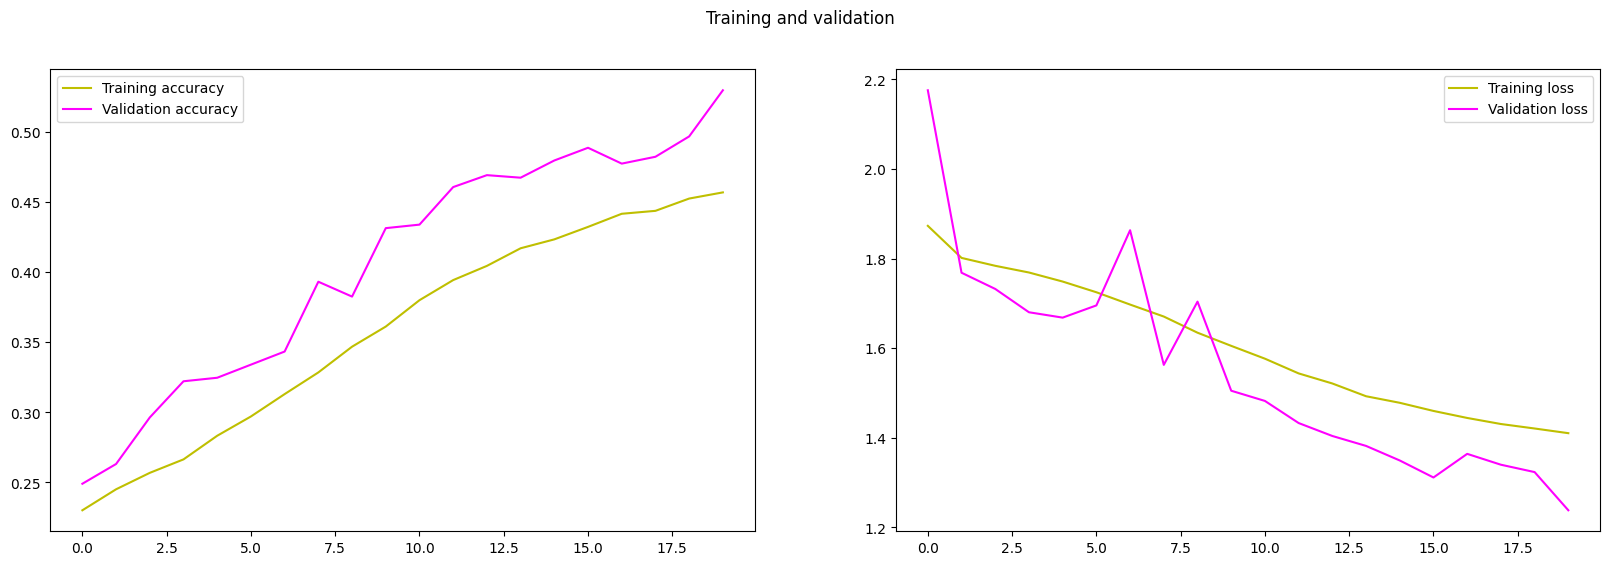

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
ax[0].plot(epochs, acc, 'y', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'magenta', label='Validation accuracy')
ax[0].legend(loc=0)
ax[1].plot(epochs, loss, 'y', label='Training loss')
ax[1].plot(epochs, val_loss, 'magenta', label='Validation loss')
ax[1].legend(loc=0)

plt.suptitle('Training and validation')
plt.show()

4/4 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.11      0.91      0.19        11
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00        12
           4       0.00      0.00      0.00         8
           5       0.00      0.00      0.00        16
           6       0.25      0.08      0.12        13
           7       0.00      0.00      0.00        10
           8       0.00      0.00      0.00         9
           9       0.00      0.00      0.00        11

    accuracy                           0.11       100
   macro avg       0.04      0.10      0.03       100
weighted avg       0.04      0.11      0.04       100



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


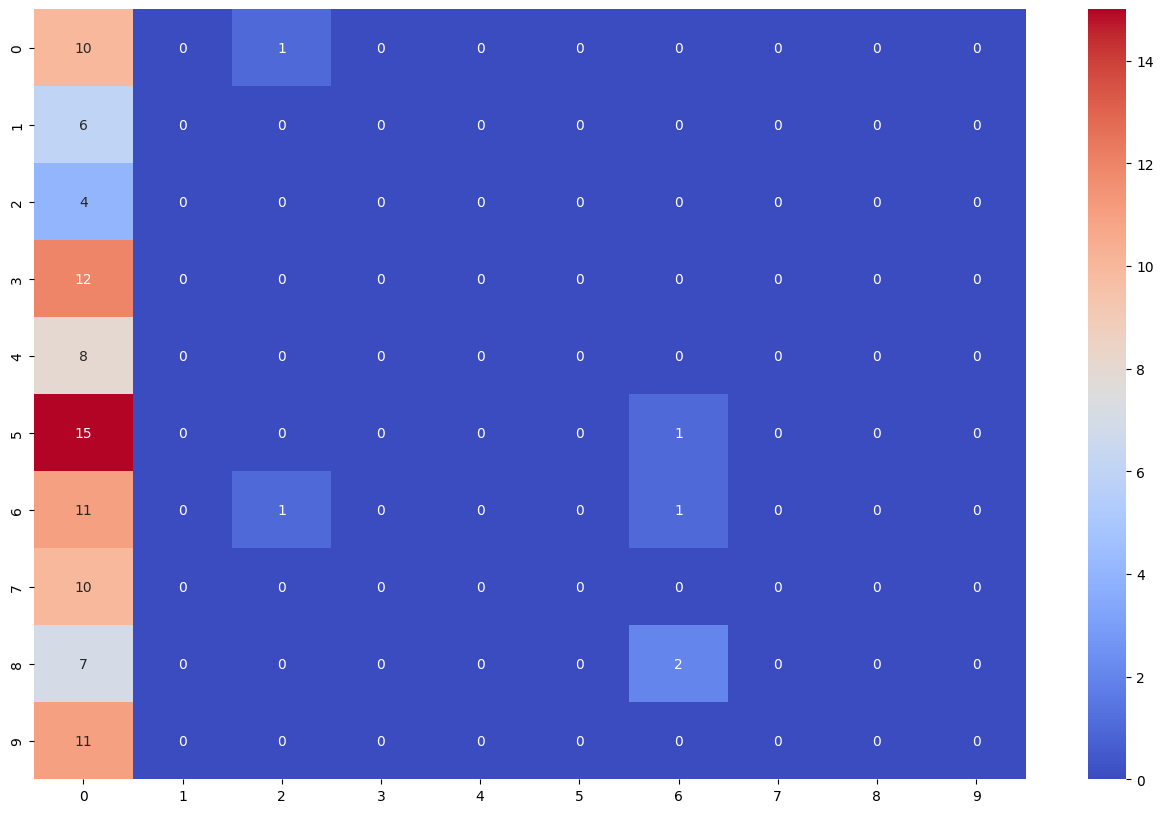

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define and compile your neural network model (example)
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Generate or load your test data (example)
test_data = np.random.rand(100, 28, 28)  # Replace with your actual test data

# Generate random true labels for demonstration purposes (replace with your actual labels)
test_ground_truth = np.random.randint(0, 10, size=(100,))

# Make predictions using the model
y_pred = np.argmax(model.predict(test_data), axis=-1)

# Define class labels
class_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# Print classification report and create a confusion matrix
print(classification_report(test_ground_truth, y_pred))
cm = confusion_matrix(test_ground_truth, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(16, 10))
sns.heatmap(cm, cmap=plt.cm.coolwarm, annot=True, fmt='.0f', xticklabels=class_labels, yticklabels=class_labels)
plt.show()


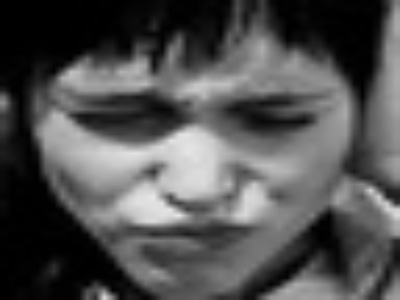

In [ ]:
#
from IPython.display import Image, display
import cv2

# Load the image
image = cv2.imread("/content/archive (2)/test/sad/PrivateTest_10455506.jpg")

# Specify the desired width and height for the displayed image (adjust as needed)
width = 400  # Change to your preferred width
height = 300  # Change to your preferred height

# Resize the image
resized_image = cv2.resize(image, (width, height))

# Save the resized image to a temporary file
temp_image_path = "/content/resized_image.jpg"
cv2.imwrite(temp_image_path, resized_image)

# Display the resized image
display(Image(filename=temp_image_path))



In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('model.h5', custom_objects={'CustomAdam': CustomAdam})

# Load and preprocess the image
img = cv2.imread('/content/archive (2)/test/sad/PrivateTest_10455506.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
img = cv2.resize(img, (28, 28))  # Resize to the model's expected input shape
img = img / 255.0  # Normalize to [0, 1]
img = img.reshape(1, 28, 28)  # Reshape to match the model's input shape

# Make predictions
predictions = model.predict(img)
label = EMOTIONS[np.argmax(predictions)]

# Output the prediction
for emotion, prediction in zip(EMOTIONS, predictions[0]):
    print(f"{emotion}: {prediction:.2%}")

print(f"\nThe system considers this expression to be: {label}")


1/1 [==============================] - 0s 87ms/step
Angry: 5.86%
Disgust: 17.76%
Happy: 14.17%
Sad: 12.20%
Surprise: 10.06%
Neutral: 6.69%

The system considers this expression to be: Disgust


In [ ]:
import random
from IPython.display import Audio, display

if label == 'Angry':
    path = "/content/Angry Mood Off After Breakup.mp3"
    print("Now Playing:", path)
    audio = Audio(filename=path, autoplay=True)
    display(audio)

elif label == 'Disgust':
    path = "/content/Mood Off ! Mood Off ! Sad Mood (1).mp3"
    print("Now Playing:", path)
    audio = Audio(filename=path, autoplay=True)
    display(audio)

elif label == "Happy":
    path = "/content/Cheap thrills.mp3"
    print("Now Playing:", path)
    audio = Audio(filename=path, autoplay=True)
    display(audio)

elif label == 'Sad':
    path = "/content/English Sad Song Slow Music heart touching painful.mp3"
    print("Now Playing:", path)
    audio = Audio(filename=path, autoplay=True)
    display(audio)

elif label == 'Surprise':
    path = "/content/Memories ... maroon 5.mp3"
    print("Now Playing:", path)
    audio = Audio(filename=path, autoplay=True)
    display(audio)

elif label == 'Neutral':
    path = "/content/Horror Movie.mp3"
    print("Now Playing:", path)
    audio = Audio(filename=path, autoplay=True)
    display(audio)


Now Playing: /content/Mood Off ! Mood Off ! Sad Mood (1).mp3
